# HW/ Exercise From Yesterday

Given zipcode_data.txt , get all the zipcodes out of the file and find the most common digit for all the zipcodes 
( the most common digit is going to be a number 0 - 9. ) 
- Print the the frequency of each digit
- use mysql connector to create a table from the data called 'zipcodes' with all the zipcodes 
- use mysql connector to create a second table from the data called 'frequency' with the frequency of each digits 

# Warm-Up Exercise For Today

refactor most common word solution to also filter by the text file function_words. 
https://github.com/dd-code-immersives/py-112-code/blob/main/exercises/find_most_common_word.py

If a word is in the text file, don't add it to the dictionary. 

What are the most common words in the text after filtering?


In [ ]:
text="""
Computer programming is the process of designing and building an executable computer program to accomplish a specific computing result or to perform a specific task. Programming involves tasks such as: analysis, generating algorithms, profiling algorithms' accuracy and resource consumption, and the implementation of algorithms in a chosen programming language (commonly referred to as coding).[1][2] The source code of a program is written in one or more languages that are intelligible to programmers, rather than machine code, which is directly executed by the central processing unit. The purpose of programming is to find a sequence of instructions that will automate the performance of a task (which can be as complex as an operating system) on a computer, often for solving a given problem. Proficient programming thus often requires expertise in several different subjects, including knowledge of the application domain, specialized algorithms, and formal logic.
Tasks accompanying and related to programming include: testing, debugging, source code maintenance, implementation of build systems, and management of derived artifacts, such as the machine code of computer programs. These might be considered part of the programming process, but often the term software development is used for this larger process with the term programming, implementation, or coding reserved for the actual writing of code. Software engineering combines engineering techniques with software development practices. Reverse engineering is a related process used by designers, analysts and programmers to understand and re-create/re-implement
"""
import string
import pprint

filePath = r'/Users/yani/Desktop/PY-112-MySQL/function_words.txt'

'''Formating data from text file into a list of strings'''
wordLi = []
with open(filePath, 'r') as funWords:
    for line in funWords:
        line = line.lower().strip()
        wordLi.append(line)
# print(wordLi) 
# Output ['the', 'a', 'he', 'him', 'she',...





def MaxWord(str1=""):
    str1 = str1.translate(str.maketrans('', '', string.punctuation )) 
    # Gets rid of all of the punctuation so that every word will be recognized
    liStr = str1.lower().split()                                     
    # Need to use .lower because casing matters when identifying words in a string. Ex) if 'The' is not changed to 'the' then it           will count 2 'The' and 10 'the'. The .split() method splits the string into a list of strings. 
    
    # print(str1)
    # print(liStr)
   
    Dict1 = {}
    for x in liStr:
        if x.isalpha() and x not in wordLi and x not in Dict1: # Not in Dict1 makes your counter more efficient since it will only                                                                    count the word if it already hasn't been counted. 
            Dict1 [x] = liStr.count(x)
    wordMax = max(Dict1.values())
    for k,v in Dict1.items():
        if v == wordMax:
            pprint.pp(f"'{k}' is the most common word. It appeared {v} times")
    # pprint.pp(Dict1)
    

MaxWord(text)

In [ ]:
## Advantages and Disadvantages of Stored Procedures

### Advantages

***Reduce network traffic***
Stored procedures help reduce the network traffic between applications and MySQL Server. Because instead of sending multiple lengthy SQL statements, applications have to send only the name and parameters of stored procedures.

***Centralize business logic in the database***
You can use the stored procedures to implement business logic that is reusable by multiple applications. The stored procedures help reduce the efforts of duplicating the same logic in many applications and make your database more consistent.

***Make database more secure***
The database administrator can grant appropriate privileges to applications that only access specific stored procedures without giving any privileges on the underlying tables.

### Disadvantages

***Resource usages***
If you use many stored procedures, the memory usage of every connection will increase substantially.

Besides, overusing a large number of logical operations in the stored procedures will increase the CPU usage because the MySQL is not well-designed for logical operations.

***Troubleshooting***
It’s difficult to debug stored procedures. Unfortunately, MySQL does not provide any facilities to debug stored procedures like other enterprise database products such as Oracle and SQL Server.

***Maintenances***
Developing and maintaining stored procedures often requires a specialized skill set that not all application developers possess. This may lead to problems in both application development and maintenance.


# Using Stored Procedures 
```
SELECT * FROM Artist;
```

***Note DELIMITER just changes the delimiter to 
// temporarily (it's ; by default) it's not part of stored procedures***

## Syntax for creating stored procedures 
```
CREATE PROCEDURE procedure_name(parameter_list)
BEGIN
   statements;
END //
```
i.e.

```
DELIMITER //

CREATE PROCEDURE GetAllArtists()
BEGIN
	SELECT *  FROM Artist;
END //

DELIMITER ;
```
## Syntax for calling stored procedures 
```
CALL stored_procedure_name(argument_list);
```
i.e.

```
CALL GetAllArtists();
```




## Using stored procedures with python/mysql connector

In [ ]:
### sample code
import mysql.connector
from dotenv import dotenv_values

config = dotenv_values(".env")  # config = {"USER": "foo", "EMAIL": "foo@example.org"}

mydb = mysql.connector.connect(
  host=config['HOST'],
  user=config['USER'],
  password=config['PASSWORD'],
  database="Chinook"
)

mycursor = mydb.cursor()

#mycursor.execute("SELECT * FROM album")
mycursor.callproc("GetSalesData")
for x in mycursor.stored_results():
  print(x.fetchall())

## How To alter a stored procedure in mysql workbench

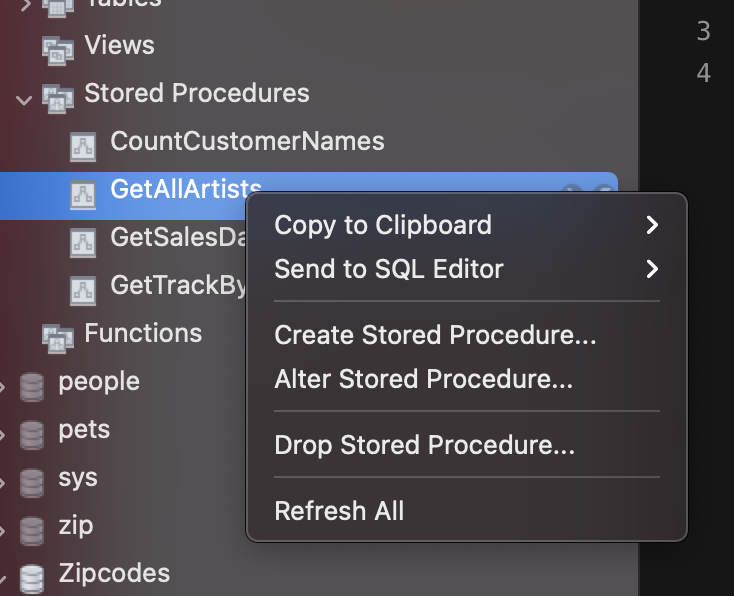

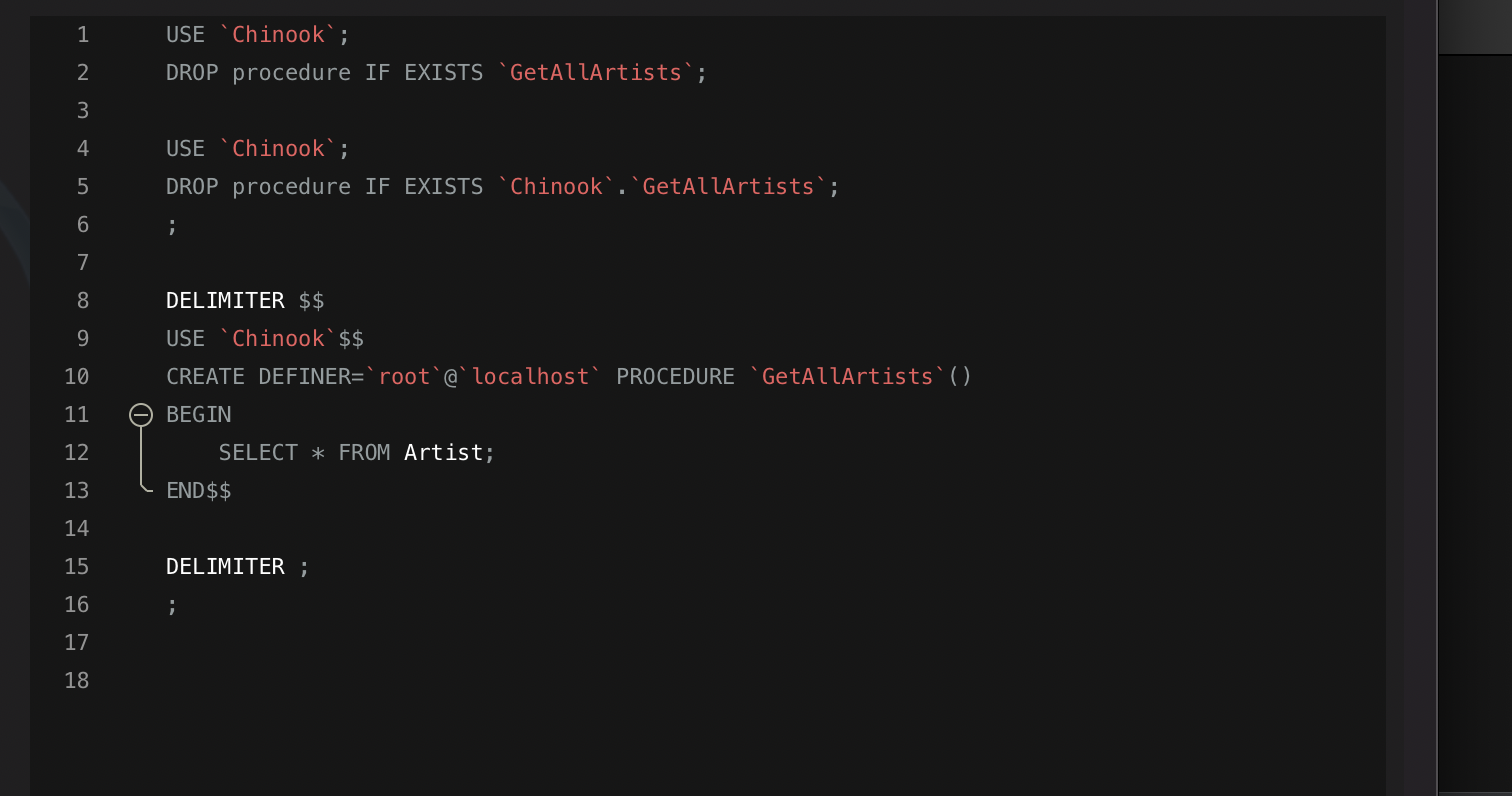

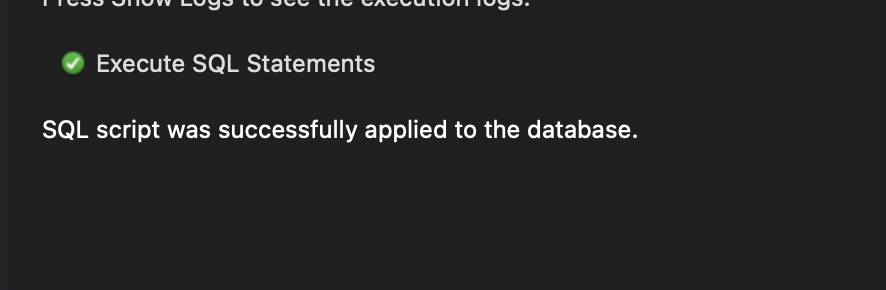

# Using Stored Procedures with parameters 
```
DELIMITER //

CREATE PROCEDURE GetTrackByName(
	IN Track VARCHAR(255)
)
BEGIN
	SELECT * 
 	FROM track
	WHERE track = track;
END //

DELIMITER ;
```
i.e.

```
CALL GetTrackByName('Amazing');
```

## In and Out Parameters 
```
DELIMITER $$

CREATE PROCEDURE CountCustomerNames (
	IN  name VARCHAR(25),
	OUT total INT
)
BEGIN
	SELECT COUNT(name)
	INTO total
	FROM Customer
	WHERE FirstName = name;
END$$CountCustomerNames


DELIMITER ;
```
Then to call CountCustomerNames and retrieve the variable 
```
CALL CountCustomerNames('Helena' , @total);
SELECT @total AS total_name_count;
```

### Listing Stored Procedures
```
SHOW PROCEDURE STATUS;
```

### Using Variables with stored procedures 
```
BEGIN
	DECLARE albumCount INT DEFAULT 0;
	SELECT COUNT(*) 
	INTO albumCount
	FROM album;
END
```
NOTE: usually you can only use DECLARE inside a procedure definition

```
DELIMITER $$

CREATE PROCEDURE GetTotalInvoice()
BEGIN
	DECLARE totalInvoice INT DEFAULT 0;
    
    SELECT COUNT(*) 
    INTO totalInvoice
    FROM invoice;
    
    SELECT totalInvoice;
END$$

DELIMITER ;
```

## Using Foreign Keys

A FOREIGN KEY is a field (or collection of fields) in one table, that refers to the PRIMARY KEY in another table.
We can use foreign keys to restrict changes to a table

Types of foreign keys:
- CASCADE: if a row from the parent table is deleted or updated, the values of the matching rows in the child table automatically deleted or updated.
- SET NULL:  if a row from the parent table is deleted or updated, the values of the foreign key column (or columns) in the child table are set to NULL.
- RESTRICT:  if a row from the parent table has a matching row in the child table, MySQL rejects deleting or updating rows in the parent table.
- NO ACTION: is the same as RESTRICT.
- SET DEFAULT: is recognized by the MySQL parser. However, this action is rejected by both InnoDB and NDB tables.

**Create Tables**
```
CREATE TABLE categories(
    categoryId INT AUTO_INCREMENT PRIMARY KEY,
    categoryName VARCHAR(100) NOT NULL
) ENGINE=INNODB;

CREATE TABLE products(
    productId INT AUTO_INCREMENT PRIMARY KEY,
    productName varchar(100) not null,
    categoryId INT,
    CONSTRAINT fk_category
    FOREIGN KEY (categoryId) 
        REFERENCES categories(categoryId)
) ENGINE=INNODB;
``` 

**Insert some values into categories** 
```
INSERT INTO categories(categoryName)
VALUES
    ('Smartphone'),
    ('Smartwatch');
```
**Make sure values went in**
```
SELECT * FROM categories;
```

**Insert into products (table with foreign key restriction)**
```
INSERT INTO products(productName, categoryId)
VALUES('iPhone',1);
```
NOTE: <em>This works because there is a value with the index of 1 in categories! Foreign key has bound these two tables
</em>


**Try inserting a value into products that doesn't exist in categories**
```
INSERT INTO products(productName, categoryId)
VALUES('iPad',3);
```

NOTE: <em>This throws an error, because 3 does not exist in categories, this proves that our foreign key constraint is working
</em>

### Using Cascade (Foreign Keys continued)
***Drop Table***
```
DROP TABLE products;
```

***Recreate products with cascade conditions***
```
CREATE TABLE products(
    productId INT AUTO_INCREMENT PRIMARY KEY,
    productName varchar(100) not null,
    categoryId INT NOT NULL,
    CONSTRAINT fk_category
    FOREIGN KEY (categoryId) 
    REFERENCES categories(categoryId)
        ON UPDATE CASCADE
        ON DELETE CASCADE
) ENGINE=INNODB;
```

***Insert values***
```
INSERT INTO products(productName, categoryId)
VALUES
    ('iPhone', 1), 
    ('Galaxy Note',1),
    ('Apple Watch',2),
    ('Samsung Galary Watch',2);

```

***Make sure values went in***
```
SELECT * FROM products;
```
***try to update categories table***
```
UPDATE categories
SET categoryId = 100
WHERE categoryId = 1;
```

***check values of tables to see how change took affect*** 
```
SELECT * FROM categories;
SELECT * FROM products;
```
NOTE: notice how although we changed categories, products was updated, that is the power of cascade!<em>
</em>

**try to delete values in categories table*** 
```
DELETE FROM categories
WHERE categoryId = 2;
```
***check values of tables were deleted*** 
```
SELECT * FROM categories;
SELECT * FROM products;
```

### Using Set NULL (Foreign Keys continued)
***Drop Tables***
```
DROP TABLE IF EXISTS categories;
DROP TABLE IF EXISTS products;
```

***Recreate products with set null conditions***
```
CREATE TABLE categories(
    categoryId INT AUTO_INCREMENT PRIMARY KEY,
    categoryName VARCHAR(100) NOT NULL
)ENGINE=INNODB;

CREATE TABLE products(
    productId INT AUTO_INCREMENT PRIMARY KEY,
    productName varchar(100) not null,
    categoryId INT,
    CONSTRAINT fk_category
    FOREIGN KEY (categoryId) 
        REFERENCES categories(categoryId)
        ON UPDATE SET NULL
        ON DELETE SET NULL 
)ENGINE=INNODB;
```

***Insert values***
```
INSERT INTO categories(categoryName)
VALUES
    ('Smartphone'),
    ('Smartwatch');


INSERT INTO products(productName, categoryId)
VALUES
    ('iPhone', 1), 
    ('Galaxy Note',1),
    ('Apple Watch',2),
    ('Samsung Galary Watch',2);

```

***Make sure values went in***
```
SELECT * FROM products;
```
***try to update categories table***
```
UPDATE categories
SET categoryId = 100
WHERE categoryId = 1;
```

***check values of tables to see how change took affect*** 
```
SELECT * FROM categories;
```
NOTE: notice how although we changed categories, products was updated, that is the power of cascade!<em>
</em>

**try to delete values in categories table*** 
```
DELETE FROM categories 
WHERE categoryId = 2;
```
***check values of tables were deleted*** 
```
SELECT * FROM products;
```

### Showing create table command 
```
SHOW CREATE TABLE
```